In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [3]:
df = df.drop(columns=['ID'])

# initialize
num_cols = 0
cat_cols = 0
num_vals = []
cat_vals = []

# Loop through 
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        cat_cols += 1
        cat_vals.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numerical
        num_cols += 1
        num_vals.append(col)
# Print the results
print("Number of numerical columns:", num_cols)
print("The numerical columns are:", num_vals)
print("Number of categorical columns:", cat_cols)
print("The categorical columns are:", cat_vals)

Number of numerical columns: 12
The numerical columns are: ['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']
Number of categorical columns: 21
The categorical columns are: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


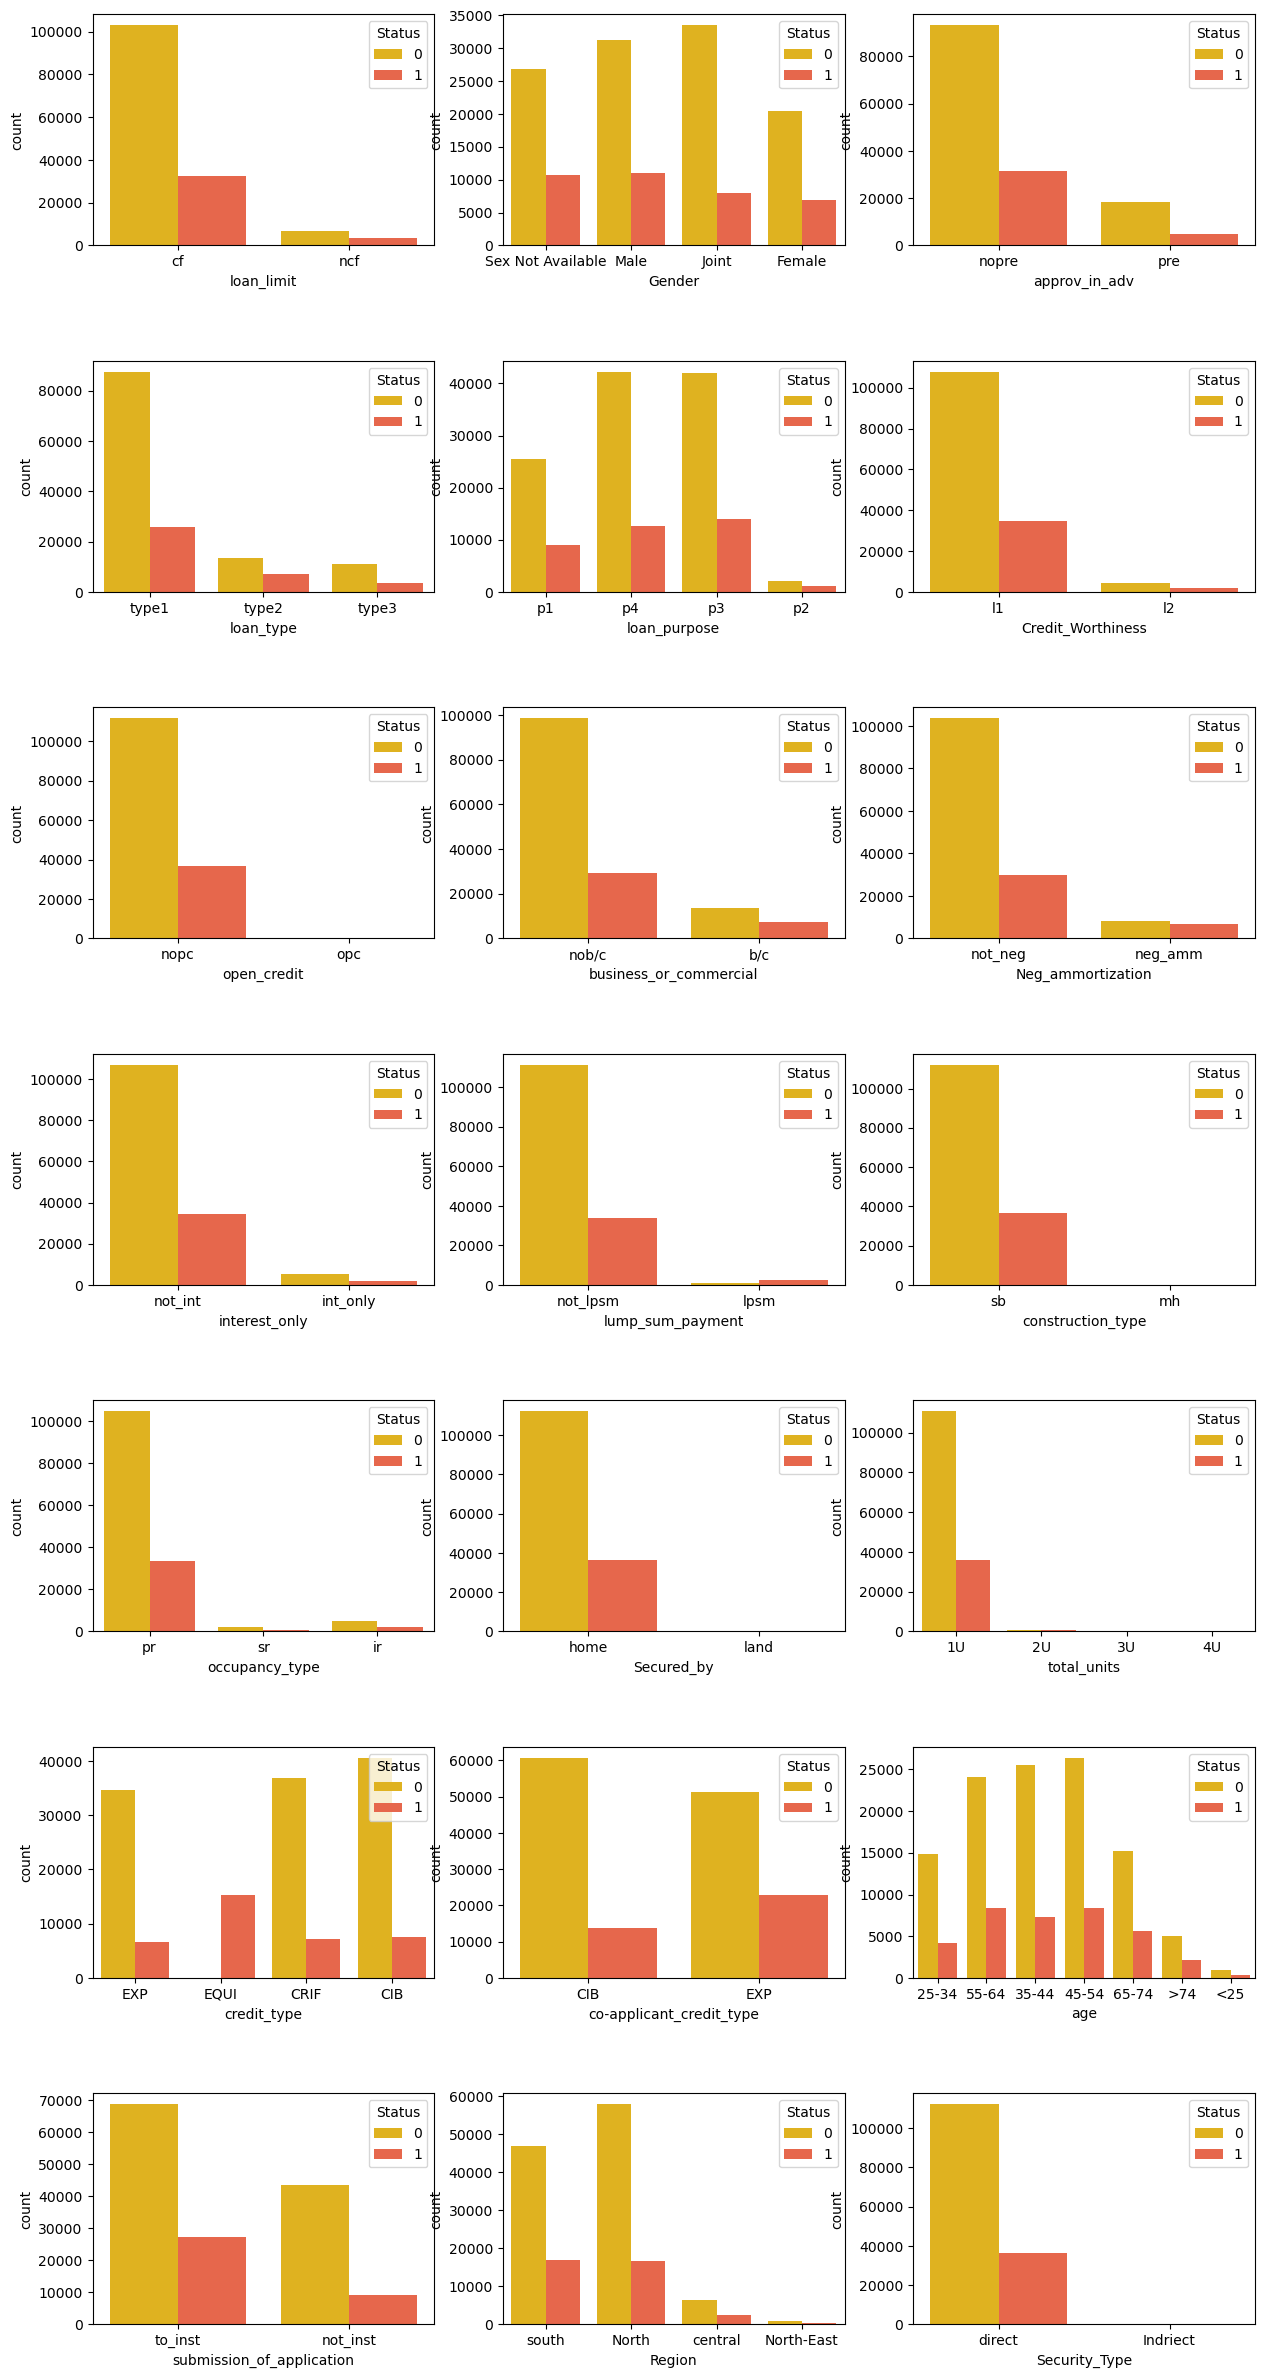

In [4]:
# Create subplots for each categorical column
fig, axes = plt.subplots(7, 3, figsize=(15, 30))

colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#4A235A', '#154360', '#0E6251']

# Loop over categorical columns
for idx, cat_col in enumerate(cat_vals):
    row, col = idx // 3, idx % 3
    try:
        sns.countplot(x=cat_col, data=df, hue='Status', palette=colors , ax=axes[row, col])
        axes[row, col].tick_params(axis='x', labelsize=10)
    except IndexError:
        # Handle the exception by printing an error message
        print(f"IndexError: index {idx} is out of bounds for axis 0 with size {axes.shape[0]}")
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

           year   loan_amount  rate_of_interest  Interest_rate_spread  \
count  148670.0  1.486700e+05     112231.000000         112031.000000   
mean     2019.0  3.311177e+05          4.045476              0.441656   
std         0.0  1.839093e+05          0.561391              0.513043   
min      2019.0  1.650000e+04          0.000000             -3.638000   
25%      2019.0  1.965000e+05          3.625000              0.076000   
50%      2019.0  2.965000e+05          3.990000              0.390400   
75%      2019.0  4.365000e+05          4.375000              0.775400   
max      2019.0  3.576500e+06          8.000000              3.357000   

       Upfront_charges           term  property_value         income  \
count    109028.000000  148629.000000    1.335720e+05  139520.000000   
mean       3224.996127     335.136582    4.978935e+05    6957.338876   
std        3251.121510      58.409084    3.599353e+05    6496.586382   
min           0.000000      96.000000    8.000000e+03 

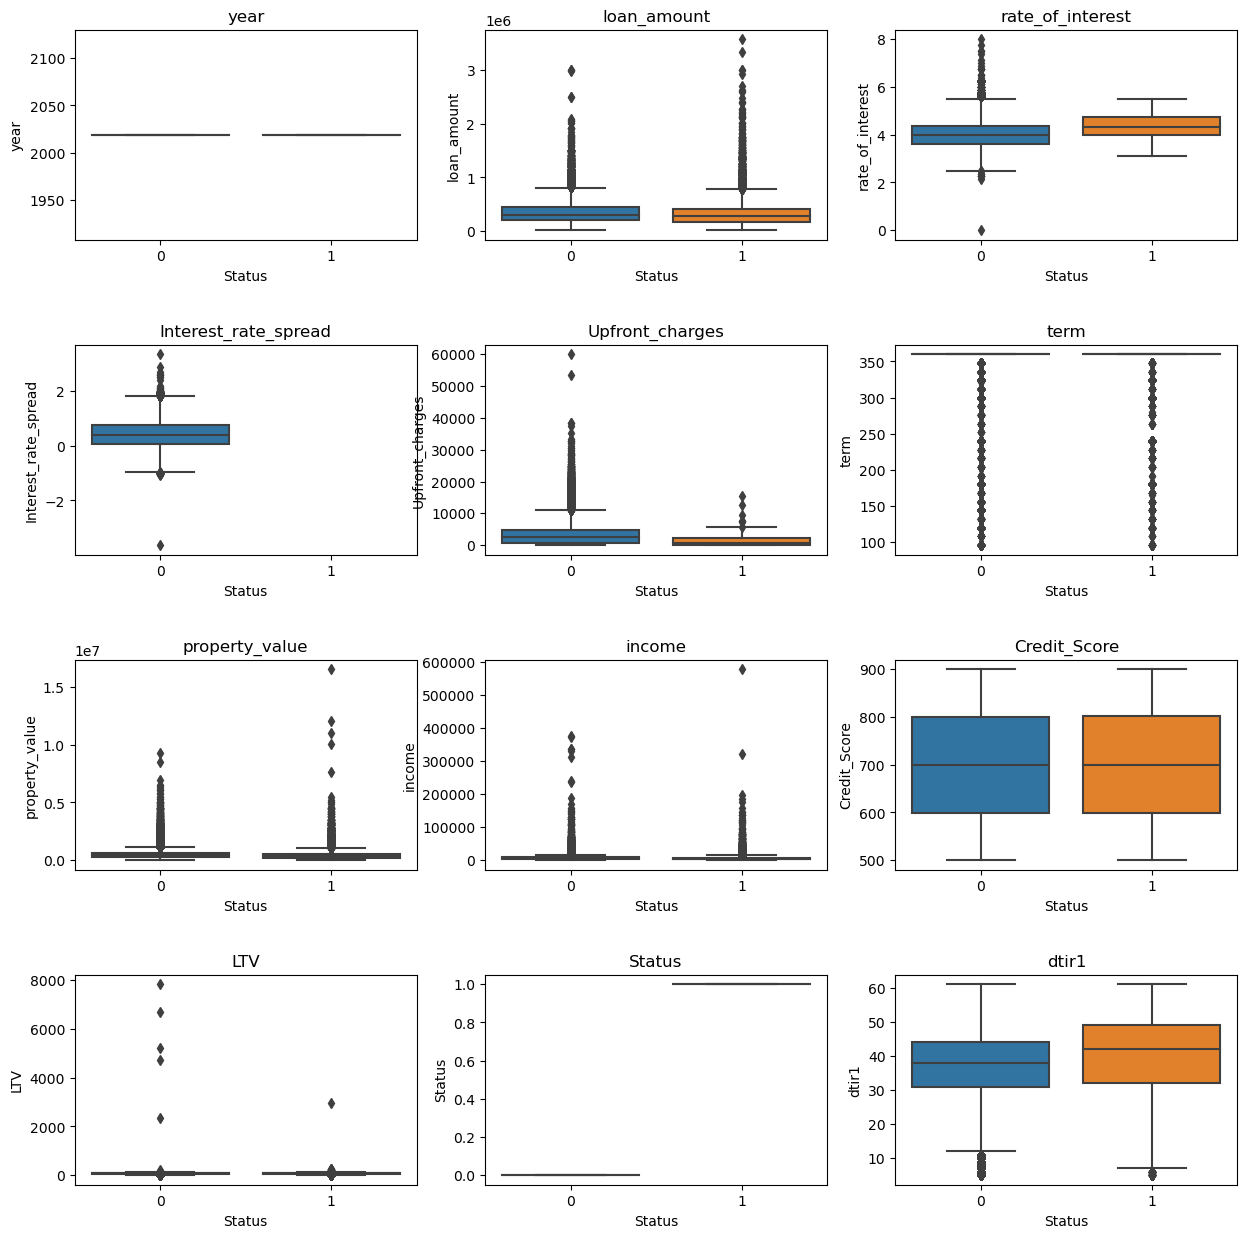

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

for idx, num_col in enumerate(num_vals):
    row, col = idx // 3, idx % 3
    sns.boxplot(y=num_col, data=df, x='Status', ax=axes[row, col])
    axes[row, col].set_title(num_col)

print(df[num_vals].describe())
plt.subplots_adjust(hspace=0.5)


In [6]:
from scipy.stats import ttest_ind

#num_cols = ['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

for col in num_vals:
    stat, p = ttest_ind(df[col][df['Status'] == 0], df[col][df['Status'] == 1], equal_var=False)
    print(col, ':')
    print('t-statistic:', stat)
    print('p-value:', p)
    print('-------------------------------')


year :
t-statistic: nan
p-value: nan
-------------------------------
loan_amount :
t-statistic: 13.00418752466545
p-value: 1.3223139241339813e-38
-------------------------------
rate_of_interest :
t-statistic: nan
p-value: nan
-------------------------------
Interest_rate_spread :
t-statistic: nan
p-value: nan
-------------------------------
Upfront_charges :
t-statistic: nan
p-value: nan
-------------------------------
term :
t-statistic: nan
p-value: nan
-------------------------------
property_value :
t-statistic: nan
p-value: nan
-------------------------------
income :
t-statistic: nan
p-value: nan
-------------------------------
Credit_Score :
t-statistic: -1.5382651698677738
p-value: 0.12398889772248435
-------------------------------
LTV :
t-statistic: nan
p-value: nan
-------------------------------
Status :
t-statistic: -inf
p-value: 0.0
-------------------------------
dtir1 :
t-statistic: nan
p-value: nan
-------------------------------


/var/folders/nf/3g7h8xwd4llcmt6cc3214qt80000gn/T/ipykernel_11577/2947886355.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p = ttest_ind(df[col][df['Status'] == 0], df[col][df['Status'] == 1], equal_var=False)


In [7]:
# Check for null values in the numerical categories
null_counts = df[num_vals].isnull().sum()

# Print the null counts for each column
print(null_counts)


year                        0
loan_amount                 0
rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
Credit_Score                0
LTV                     15098
Status                      0
dtir1                   24121
dtype: int64


In [8]:
# Fill null values with mean
df['rate_of_interest'].fillna(df['rate_of_interest'].mean(), inplace=True)
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(), inplace=True)
df['Upfront_charges'].fillna(df['Upfront_charges'].mean(), inplace=True)
df['term'].fillna(df['term'].mean(), inplace=True)
df['property_value'].fillna(df['property_value'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)
df['LTV'].fillna(df['LTV'].mean(), inplace=True)
df['dtir1'].fillna(df['dtir1'].mean(), inplace=True)



In [9]:
from scipy.stats import ttest_ind

#num_cols = ['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

for col in num_vals:
    stat, p = ttest_ind(df[col][df['Status'] == 0], df[col][df['Status'] == 1], equal_var=False)
    print(col, ':')
    print('t-statistic:', stat)
    print('p-value:', p)
    print('-------------------------------')

year :
t-statistic: nan
p-value: nan
-------------------------------
loan_amount :
t-statistic: 13.00418752466545
p-value: 1.3223139241339813e-38
-------------------------------
rate_of_interest :
t-statistic: -1.3058591893193907
p-value: 0.19160303790087788
-------------------------------
Interest_rate_spread :
t-statistic: -1.7021336424654616e-12
p-value: 0.999999999998642
-------------------------------
Upfront_charges :
t-statistic: 0.9556468928079537
p-value: 0.33925268406149867
-------------------------------
term :
t-statistic: 0.09384610392183662
p-value: 0.9252317016290994
-------------------------------
property_value :
t-statistic: 15.429846235945828
p-value: 1.290337065927076e-53
-------------------------------
income :
t-statistic: 22.530676996714597
p-value: 6.755998145492558e-112
-------------------------------
Credit_Score :
t-statistic: -1.5382651698677738
p-value: 0.12398889772248435
-------------------------------
LTV :
t-statistic: -16.309551775200983
p-value: 9.794

/var/folders/nf/3g7h8xwd4llcmt6cc3214qt80000gn/T/ipykernel_11577/2513512079.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p = ttest_ind(df[col][df['Status'] == 0], df[col][df['Status'] == 1], equal_var=False)


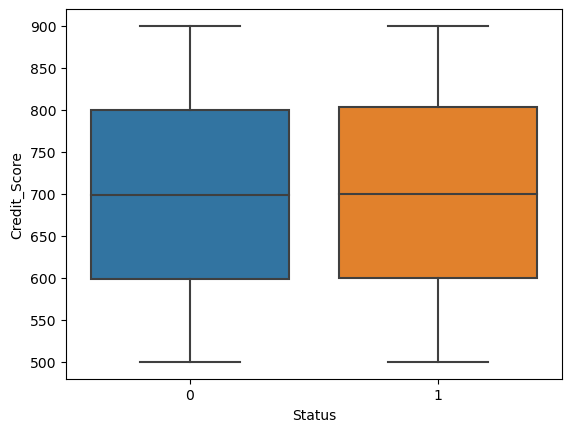

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Status", y="Credit_Score", data=df)
plt.show()


In [11]:
import scipy.stats as stats

status_0_scores = df[df["Status"] == 0]["Credit_Score"]
status_1_scores = df[df["Status"] == 1]["Credit_Score"]

mean_0 = status_0_scores.mean()
mean_1 = status_1_scores.mean()
std_0 = status_0_scores.std()
std_1 = status_1_scores.std()

t_stat, p_val = stats.ttest_ind(status_0_scores, status_1_scores)

print("Mean Credit_Score for Status 0: {:.2f}".format(mean_0))
print("Mean Credit_Score for Status 1: {:.2f}".format(mean_1))
print("Standard deviation of Credit_Score for Status 0: {:.2f}".format(std_0))
print("Standard deviation of Credit_Score for Status 1: {:.2f}".format(std_1))
print("t-statistic: {:.2f}".format(t_stat))
print("p-value: {:.2e}".format(p_val))


Mean Credit_Score for Status 0: 699.52
Mean Credit_Score for Status 1: 700.60
Standard deviation of Credit_Score for Status 0: 115.67
Standard deviation of Credit_Score for Status 1: 116.49
t-statistic: -1.54
p-value: 1.23e-01


In [12]:

# # Use get_dummies() to one-hot encode the categorical features
# encoded_df = pd.get_dummies(df[cat_vals], drop_first=True)

# # Concatenate the encoded features with the original DataFrame
# df = pd.concat([df, encoded_df], axis=1)

# # Drop the original categorical features
# df = df.drop(cat_vals, axis=1)

encoded_df = pd.get_dummies(df,drop_first=True)
encoded_df.head()


,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,2019,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,...,0,0,0,0,0,1,0,0,1,1
1,2019,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,...,0,1,0,0,0,1,0,0,0,1
2,2019,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,...,0,0,0,0,0,1,0,0,1,1
3,2019,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,...,1,0,0,0,0,0,0,0,0,1
4,2019,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,...,0,0,0,0,0,0,0,0,0,1


In [13]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   year                               148670 non-null  int64  
 1   loan_amount                        148670 non-null  int64  
 2   rate_of_interest                   148670 non-null  float64
 3   Interest_rate_spread               148670 non-null  float64
 4   Upfront_charges                    148670 non-null  float64
 5   term                               148670 non-null  float64
 6   property_value                     148670 non-null  float64
 7   income                             148670 non-null  float64
 8   Credit_Score                       148670 non-null  int64  
 9   LTV                                148670 non-null  float64
 10  Status                             148670 non-null  int64  
 11  dtir1                              1486

In [14]:
columns_to_drop = ['year', 'rate_of_interest', 'Credit_Score', 'Interest_rate_spread', 'Upfront_charges', 'term', 'open_credit_opc', 'occupancy_type_pr', 'occupancy_type_sr', 'Secured_by_land', 'total_units_2U', 'total_units_3U', 'total_units_4U', 'Security_Type_direct']
X = encoded_df.drop(columns=['Status'] + columns_to_drop)
y = encoded_df['Status']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_train = tree_clf.predict(X_train)

print("Accuracy - Training Data Set: ", accuracy_score(y_train, y_pred_train))
print("F1 Score - Training Data Set : ", f1_score(y_train, y_pred_train))

cv_f1 = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Score - Validation Mean: ", cv_f1.mean())

cv_acc = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy - Validation Mean: ", cv_acc.mean())


Accuracy - Training Data Set:  0.9998318423353737
F1 Score - Training Data Set :  0.9996587147196342
F1 Score - Validation Mean:  0.7634013718745939
Accuracy - Validation Mean:  0.8211138571627183


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

tree_clf = DecisionTreeClassifier(min_samples_split=100, min_impurity_decrease=0.001)
tree_clf.fit(X_train, y_train)

y_train_pred = tree_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)

print("Accuracy - Training Data Set: ", train_accuracy)
print("F1 Score - Training Data Set : ", train_f1_score)

val_f1_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro')
val_accuracy_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')

val_f1_score = val_f1_scores.mean()
val_accuracy_score = val_accuracy_scores.mean()

print("F1 Score - Validation Mean: ", val_f1_score)
print("Accuracy - Validation Mean: ", val_accuracy_score)


Accuracy - Training Data Set:  0.8727466872940068
F1 Score - Training Data Set :  0.6717702934223937
F1 Score - Validation Mean:  0.8000557651017868
Accuracy - Validation Mean:  0.8743105140233807


<AxesSubplot:xlabel='Max Depth', ylabel='Values'>

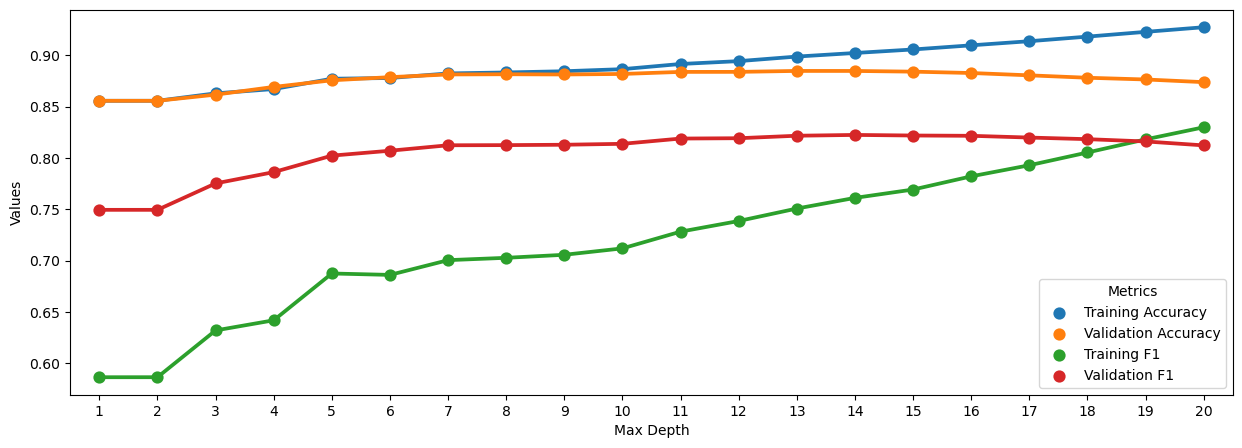

In [17]:
# Initialize empty lists to store results
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

# Loop through different max_depth values and fit decision trees
for depth in range(1, 21):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    
    # Evaluate on training data
    y_training_pred = tree_clf.predict(X_train)
    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred)
    
    # Evaluate using cross-validation on validation data
    val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Append results to lists
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

# Create a DataFrame to store results and plot them
Tuning_Max_depth = {
    "Training Accuracy": training_accuracy, 
    "Validation Accuracy": val_accuracy, 
    "Training F1": training_f1, 
    "Validation F1": val_f1, 
    "Max Depth": tree_depths 
}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Melt the DataFrame to plot multiple metrics on the same chart
plot_df = Tuning_Max_depth_df.melt('Max Depth', var_name='Metrics', value_name="Values")

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)

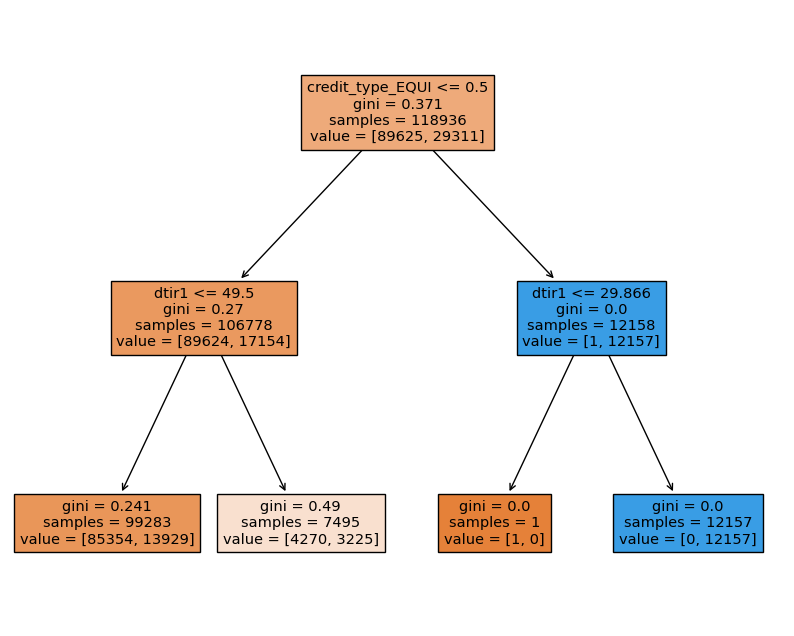

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree classifier with max depth of 2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, feature_names=X.columns, filled=True)
plt.show()


<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

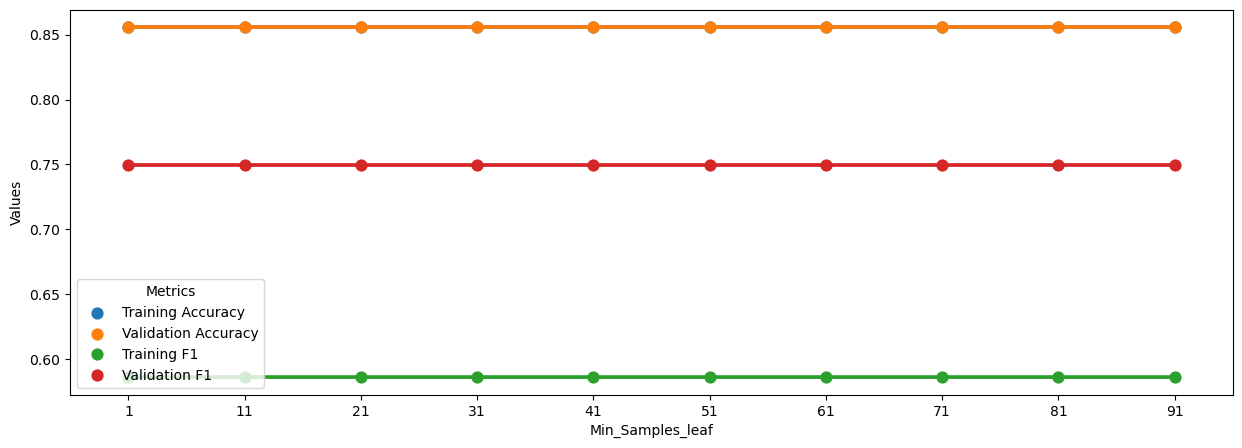

In [31]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,100,10): 
    tree_clf = DecisionTreeClassifier(max_depth=2,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [32]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Train the model
tree_clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=65)
tree_clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = tree_clf.predict(X_test_imp)

# Print accuracy and F1 score
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Test F1 Score: ", f1_score(y_test, y_pred))

# Print accuracy and F1 score in percentage
print("Test Accuracy in %: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("Test F1 Score in %: {:.2%}".format(f1_score(y_test, y_pred)))

# Create confusion matrix using pd.crosstab
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Print the pretty table
print(conf_matrix.to_string())



Test Accuracy:  0.8591511401089662
Test F1 Score:  0.599923576614444
Test Accuracy in %: 85.92%
Test F1 Score in %: 59.99%
Predicted      0     1    All
True                         
0          22406     0  22406
1           4188  3140   7328
All        26594  3140  29734


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)

print("Accuracy - Training Data Set: ", accuracy_score(y_train, y_pred_train))
print("F1 Score - Training Data Set : ", f1_score(y_train, y_pred_train))

cv_f1 = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 Score - Validation Mean: ", cv_f1.mean())

cv_acc = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy - Validation Mean: ", cv_acc.mean())

# Boxplot of cross-validation scores
# fig, ax = plt.subplots()
# ax.boxplot([cv_f1, cv_acc])
# ax.set_xticklabels(['F1 Score', 'Accuracy'])
# ax.set_ylabel('Score')
# ax.set_title('Cross-validation performance')

# # Create a bar plot for accuracy and F1 score
# fig, ax = plt.subplots()
# labels = ['Training', 'Validation']
# accuracy_scores = [train_accuracy, val_accuracy]
# f1_scores = [train_f1_score, val_f1_score]


plt.show()


/Users/olubusayoamowe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy - Training Data Set:  0.8696946256810385
F1 Score - Training Data Set :  0.6718194138573608


/Users/olubusayoamowe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/olubusayoamowe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

F1 Score - Validation Mean:  0.744353461380887


/Users/olubusayoamowe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/olubusayoamowe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

Accuracy - Validation Mean:  0.8377867043188049


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# import pandas as pd

# # Train the model
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = knn.predict(X_test)

# # Create the confusion matrix using Pandas crosstab function
# cm = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# # Print the confusion matrix
# print(cm)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, f1_score

# svm_clf = SVC(kernel='linear')
# svm_clf.fit(X_train, y_train)
# y_pred_train = svm_clf.predict(X_train)

# print("Accuracy - Training Data Set: ", accuracy_score(y_train, y_pred_train))
# print("F1 Score - Training Data Set : ", f1_score(y_train, y_pred_train))

# cv_f1 = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='f1_macro')
# print("F1 Score - Validation Mean: ", cv_f1.mean())

# cv_acc = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy - Validation Mean: ", cv_acc.mean())


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score, make_scorer

# # Define the model and the hyperparameters to tune
# tree_clf = DecisionTreeClassifier()
# params = {'max_depth': range(1, 21)}

# # Define the scoring metric to use in the cross-validation
# scoring = {'f1_macro': make_scorer(f1_score, average='macro')}

# # Perform the grid search to find the best hyperparameters
# grid_search = GridSearchCV(tree_clf, params, scoring=scoring, cv=5, refit=False)
# grid_search.fit(X_train, y_train)

# # Print the results of the grid search
# print("Best parameters: ", grid_search.best_params_)
# print("Best validation mean F1 score: ", grid_search.best_score_)

# # Evaluate the model with the best hyperparameters on the test set
# best_tree_clf = grid_search.best_estimator_
# y_pred = best_tree_clf.predict(X_test)
# print("Test set F1 score: ", f1_score(y_test, y_pred, average='macro'))

In [ ]:
# from sklearn.model_selection import validation_curve

# # Define range of max_depth values to test
# param_range = range(1, 30)

# # Calculate training and validation scores using cross-validation
# train_scores, valid_scores = validation_curve(
#     DecisionTreeClassifier(random_state=42), 
#     X_train, 
#     y_train, 
#     param_name="max_depth", 
#     param_range=param_range,
#     cv=5,
#     scoring="f1_macro"
# )

# # Calculate mean and standard deviation of training and validation scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# valid_mean = np.mean(valid_scores, axis=1)
# valid_std = np.std(valid_scores, axis=1)

# # Plot validation curve
# plt.figure(figsize=(10,6))
# plt.title('Validation Curve with Decision Tree Classifier')
# plt.xlabel('Max Depth')
# plt.ylabel('F1 Score (Macro)')
# plt.ylim(0.99, 1.0)
# lw = 2
# plt.plot(param_range, train_mean, label='Training F1 Score',
#              color='darkorange', lw=lw)
# plt.fill_between(param_range, train_mean - train_std,
#                  train_mean + train_std, alpha=0.2,
#                  color='darkorange', lw=lw)
# plt.plot(param_range, valid_mean, label='Cross-validation F1 Score',
#              color='navy', lw=lw)
# plt.fill_between(param_range, valid_mean - valid_std,
#                  valid_mean + valid_std, alpha=0.2,
#                  color='navy', lw=lw)
# plt.legend(loc='best')
# plt.show()
